### Import third-party Library

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import SVG

### Import Modules

In [21]:
import png2svg_func as png2svg_func
import k_means
#from cairosvg import svg2png

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

### Tranditional Method

C:\Users\ryanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ryanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


True

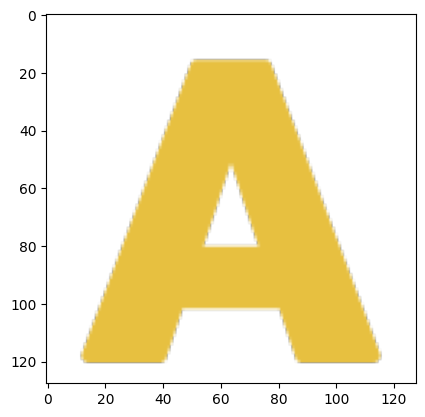

In [18]:
#img = cv2.imread("../png/128/emoji_u1f3c2_1f3fc.png", cv2.IMREAD_UNCHANGED)
img = cv2.imread("../png/128/emoji_u1f1e6.png", cv2.IMREAD_UNCHANGED)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = k_means.coverting_img(img, 32)
plt.imshow(img)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('out.png', img)
#print(img[:,:,3])

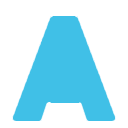

In [19]:
svg_image = png2svg_func.png2svg(img,1)
with open("result.svg", "w") as fh:
    fh.write(svg_image)
SVG("result.svg")